# Social Network Analysis - Class 8 - Finding Groups

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import networkx as nx
import igraph as ig
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Multidimensional scaling of cities

In [2]:
# slide 38 - import distance matrix of US cities

cm = pd.read_csv('Data/cities.csv')
labels = list(cm.columns)

In [3]:
cm

,Atl,Chi,Den,Hous,LA,Mia,NYC,SF,Sea,DC
0,0,587,1212,701,1936,604,748,2139,2182,543
1,587,0,920,940,1745,1188,713,1858,1737,597
2,1212,920,0,879,831,1726,1631,949,1021,1494
3,701,940,879,0,1374,968,1420,1645,1891,1220
4,1936,1745,831,1374,0,2339,2451,347,959,2300
5,604,1188,1726,968,2339,0,1092,2594,2734,923
6,748,713,1631,1420,2451,1092,0,2571,2408,205
7,2139,1858,949,1645,347,2594,2571,0,678,2442
8,2182,1737,1021,1891,959,2734,2408,678,0,2329
9,543,597,1494,1220,2300,923,205,2442,2329,0


In [99]:
cm = cm.values.astype(np.float64)

In [133]:
# slide 42 - calculate multidimensional scaling 

from sklearn.manifold import MDS
from sklearn.metrics import euclidean_distances

mds = MDS(n_components=2, random_state=100)
points = mds.fit(cm).embedding_

/Users/melindasong/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/manifold/mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


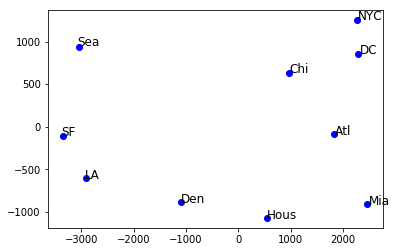

In [134]:
for i in range(len(points)):
    x = points[i][0]
    y = 0 - points[i][1]
    plt.plot(x, y, 'bo')
    plt.text(x * (1 + 0.01), y * (1 + 0.01) , labels[i], fontsize=12)
    
plt.show()

## Hierarchical clustering

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage

/Users/melindasong/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


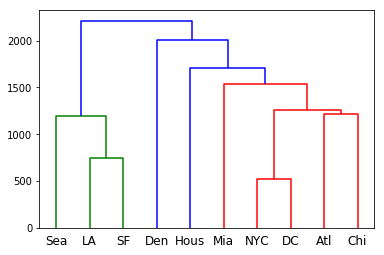

In [9]:
# slide 44

Z = linkage(cm)
dendrogram(Z, labels=labels)
plt.show()

## Corporations data

In [30]:
# slide 74 - import data

corp = pd.read_csv("Data/corporations.csv", index_col="Unnamed: 0")
corp = corp.fillna(value=0)

In [31]:
corp

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
Aetna,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alcoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
American Airlines,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
AT&T,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Automatic Data Proc.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Calpine,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Comcast,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cummins Engine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
DuPont,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Electronic Data Sys.,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [32]:
names = corp.index

# Need to make index numbers as well for the adjacency matrix
corp.index = list(np.arange(1, 26))

# Build graph
cmg = ig.Graph.Adjacency((corp.values>0).tolist())
cmg.to_undirected()
cmg.vs['ID'] = names

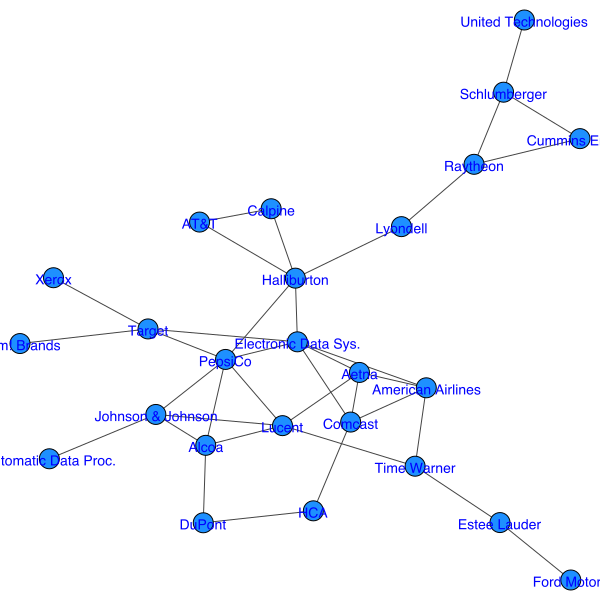

In [33]:
# slide 77
ig.plot(cmg, layout=cmg.layout_kamada_kawai(),
        vertex_color = 'dodgerblue', 
        vertex_label = cmg.vs['ID'],
        vertex_label_color = "blue")

In [34]:
# slide 78
cmg.cliques(min=3)

[(0, 2, 6),
 (0, 2, 9),
 (0, 6, 9),
 (1, 14, 15),
 (1, 14, 17),
 (1, 15, 17),
 (2, 6, 9),
 (3, 5, 12),
 (7, 18, 19),
 (9, 12, 17),
 (9, 17, 20),
 (14, 15, 17),
 (0, 2, 6, 9),
 (1, 14, 15, 17)]

In [35]:
# 79
cmgclique2 = cmg.cliques(min=2)
clique2 = pd.DataFrame.from_records(cmgclique2)

In [38]:
clique2.head()

,0,1,2,3
0,0,2,NaN,NaN
1,0,6,NaN,NaN
2,0,9,NaN,NaN
3,0,15,NaN,NaN
4,1,8,NaN,NaN


In [41]:
# create dataframe again with corporation names
corp2 = corp.copy()
corp2.index = names
corp2.columns = names

In [45]:
# slide 81 - calculate correlations among companies
friend_cors = corp2.corr()
friend_cors.head()

,Aetna,Alcoa,American Airlines,AT&T,Automatic Data Proc.,Calpine,Comcast,Cummins Engine,DuPont,Electronic Data Sys.,...,Lucent,Lyondell,PepsiCo,Raytheon,Schlumberger,Target,Time Warner,United Technologies,Xerox,Yum! Brands
Aetna,1.000000,0.107143,0.404762,-0.128698,-0.089087,-0.128698,0.404762,-0.128698,-0.128698,0.265694,...,-0.218218,-0.128698,0.265694,-0.161165,-0.161165,0.107143,0.510355,-0.089087,-0.089087,-0.089087
Alcoa,0.107143,1.000000,-0.190476,-0.128698,0.467707,-0.128698,-0.190476,-0.128698,-0.128698,0.010219,...,0.327327,-0.128698,0.265694,-0.161165,-0.161165,0.107143,0.174595,-0.089087,-0.089087,-0.089087
American Airlines,0.404762,-0.190476,1.000000,-0.128698,-0.089087,-0.128698,0.404762,-0.128698,-0.128698,0.265694,...,0.327327,-0.128698,0.010219,-0.161165,-0.161165,0.107143,-0.161165,-0.089087,-0.089087,-0.089087
AT&T,-0.128698,-0.128698,-0.128698,1.000000,-0.060193,0.456522,-0.128698,-0.086957,-0.086957,0.179520,...,-0.147442,0.456522,0.179520,-0.108893,-0.108893,-0.128698,-0.108893,-0.060193,-0.060193,-0.060193
Automatic Data Proc.,-0.089087,0.467707,-0.089087,-0.060193,1.000000,-0.060193,-0.089087,-0.060193,-0.060193,-0.114708,...,0.408248,-0.060193,0.363242,-0.075378,-0.075378,-0.089087,-0.075378,-0.041667,-0.041667,-0.041667


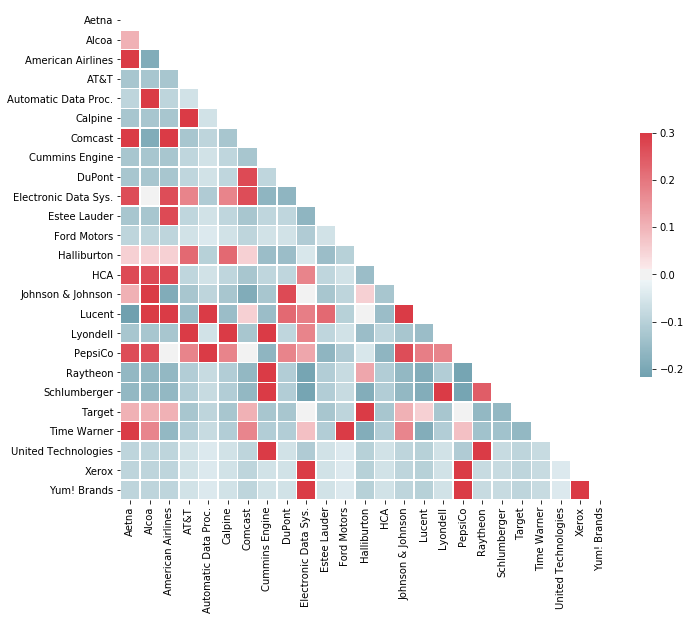

In [51]:
# slide 83 - plotting the correlation matrix

# Generate a mask for the upper triangle
mask = np.zeros_like(friend_cors, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(friend_cors, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

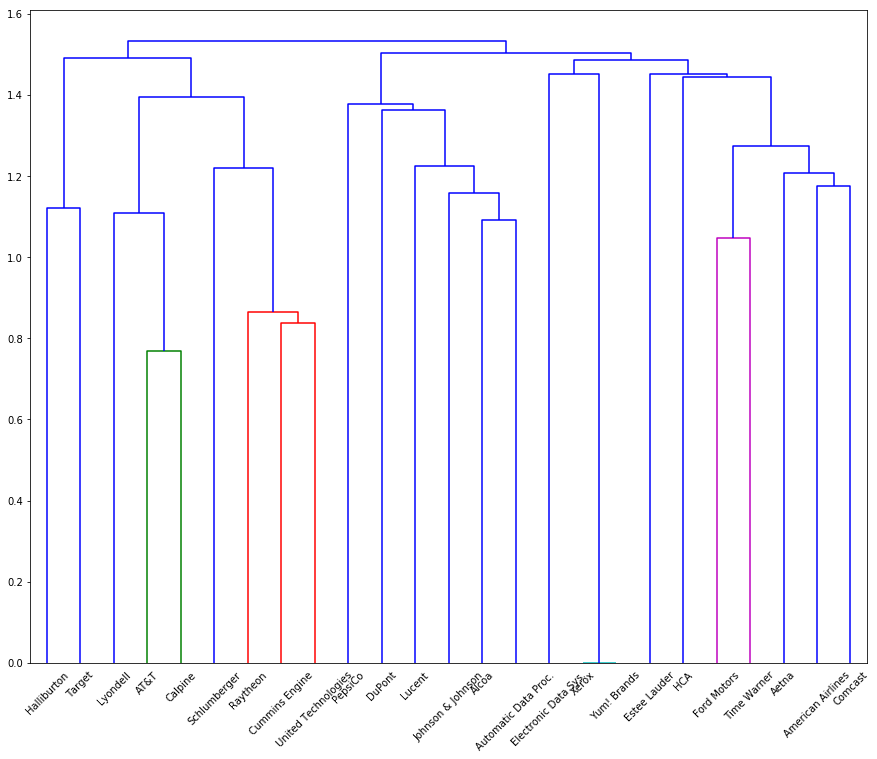

In [60]:
# slide 85-86 - cluster dendrogram for correlations
f, ax = plt.subplots(figsize=(15, 12))

Z = linkage(friend_cors)
dendrogram(Z, labels=names, ax=ax)
plt.show()

/Users/melindasong/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


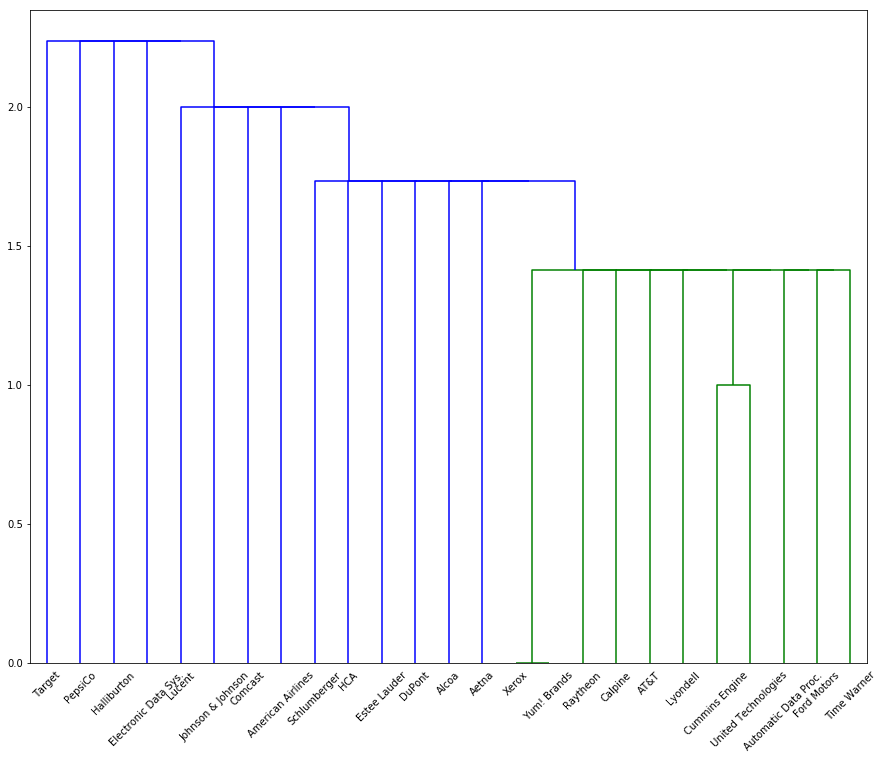

In [61]:
f, ax = plt.subplots(figsize=(15, 12))

Z = linkage(corp)
dendrogram(Z, labels=names, ax=ax)
plt.show()

/Users/melindasong/anaconda/envs/py36/lib/python3.6/site-packages/seaborn/matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)
/Users/melindasong/anaconda/envs/py36/lib/python3.6/site-packages/seaborn/matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


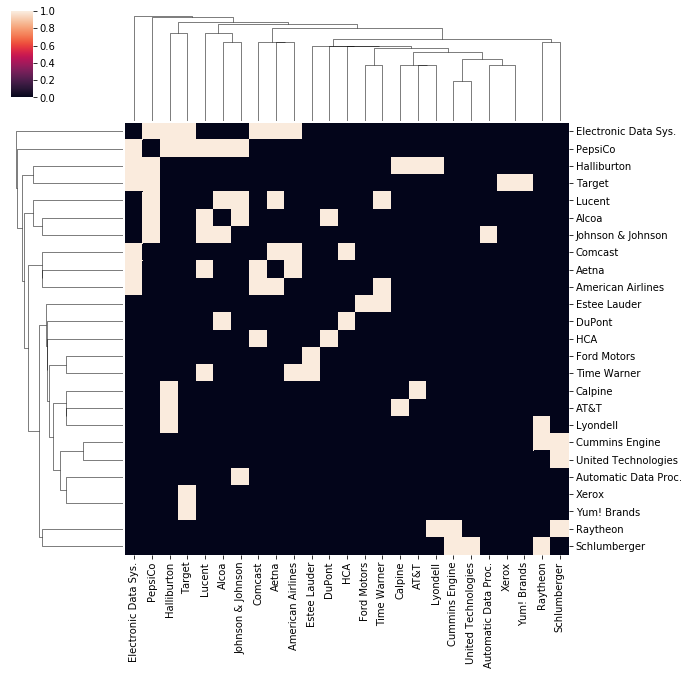

In [121]:
# slide 89 - hierarchical cluster heatmap
sns.clustermap(corp2)

In [64]:
# slide 91 - hierarchical cluster with Jaccard coeff.

from scipy.spatial.distance import pdist

dist_mat = pdist(corp.values, metric='jaccard')

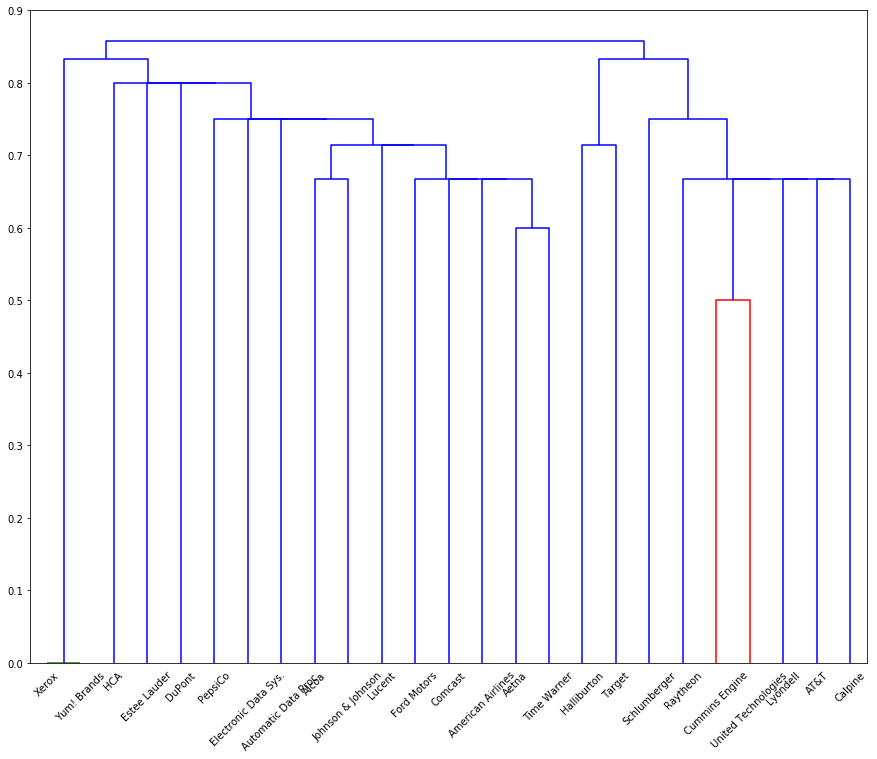

In [72]:
f, ax = plt.subplots(figsize=(15, 12))

Z = linkage(dist_mat)
dendrogram(Z, labels=names, ax=ax)
plt.show()

## Girvan-Newman

In [77]:
# slide 109 - apply the Girvan-Newman algorithm on the Citibank corporations data

gn = cmg.community_edge_betweenness()
gn = gn.as_clustering()

cmg.vs['membership'] = gn.membership

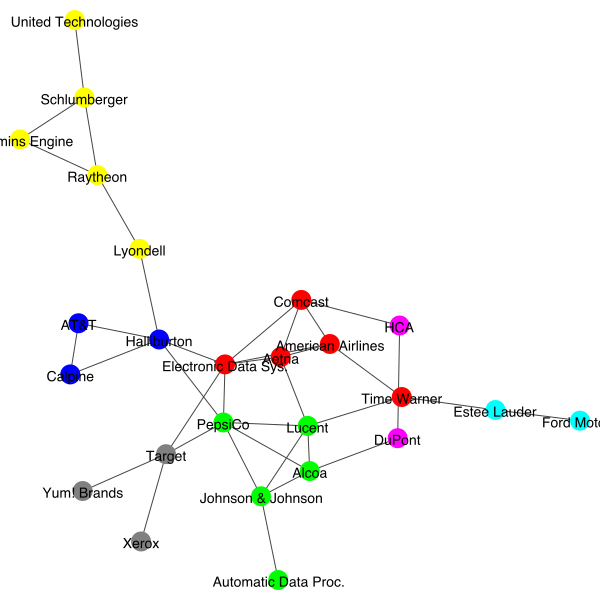

In [85]:
ig.plot(cmg, vertex_color=cmg.vs['membership'],
        vertex_label=cmg.vs['ID'],
        palette=ig.ClusterColoringPalette(len(set(cmg.vs['membership']))))

## Walktrap

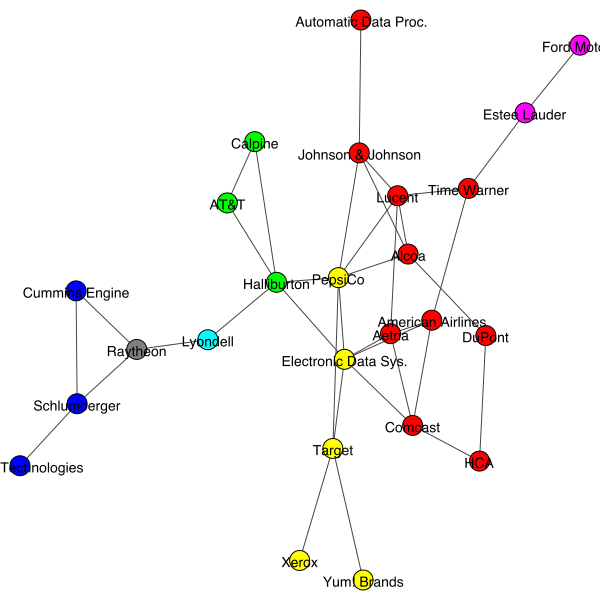

In [119]:
friend_comm_wt = cmg.community_walktrap(steps=200)
friend_comm_wt = friend_comm_wt.as_clustering()
cmg.vs['membership'] = friend_comm_wt.membership

ig.plot(cmg, vertex_color=cmg.vs['membership'],
        vertex_label=cmg.vs['ID'], 
        palette=ig.ClusterColoringPalette(len(set(cmg.vs['membership']))))

In [99]:
# slide 127 - comparing G-N and Walk trap algorithms 

cb = pd.DataFrame(gn.membership, columns=['gn'])
cb['rw'] = friend_comm_wt.membership

cb.corr()

,gn,rw
gn,1.000000,0.537457
rw,0.537457,1.000000


## Cohesive blocking

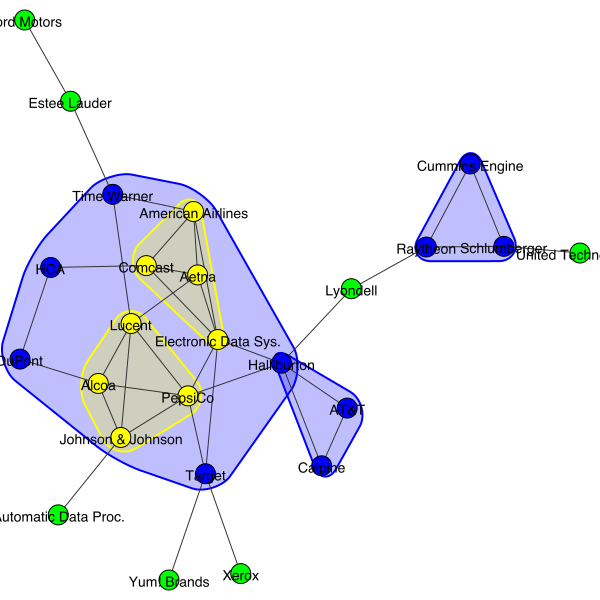

In [118]:
# slide 130 

ig.plot(cmg.cohesive_blocks(), vertex_label=cmg.vs['ID'],
       palette=ig.ClusterColoringPalette(5), mark_groups=True)